<a href="https://colab.research.google.com/github/SSInimgba/Computer_Vision/blob/master/Cartoonize_an_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
img = cv2.imread('cat.jpeg')
img

array([[[19, 18, 14],
        [26, 25, 21],
        [33, 32, 28],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[17, 16, 12],
        [23, 22, 18],
        [30, 29, 25],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[14, 13,  9],
        [21, 20, 16],
        [28, 27, 23],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[10, 10, 10],
        [ 7,  7,  7],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[10, 10, 10],
        [ 7,  7,  7],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[11, 11, 11],
        [ 8,  8,  8],
        [ 4,  4,  4],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

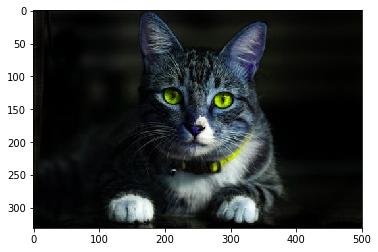

In [17]:
plt.imshow(img)

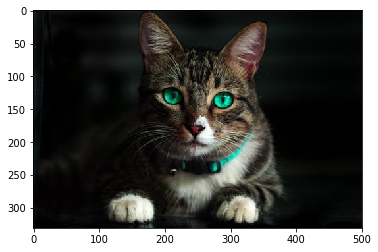

In [18]:
#convert to RGB

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

In [0]:
#Using Bilateral filter 

num_bilateral = 7 #bilateral filter steps


for _ in range(num_bilateral):
  img_cartoon = cv2.bilateralFilter(img_RGB, d = 9, sigmaColor = 150, sigmaSpace = 130 )

In [0]:
#Image comparison method
def display(x,y):
    f , (ax1,ax2) = plt.subplots(1,2, figsize = (20,20))
    ax1.imshow(x)
    ax2.imshow(y)
    

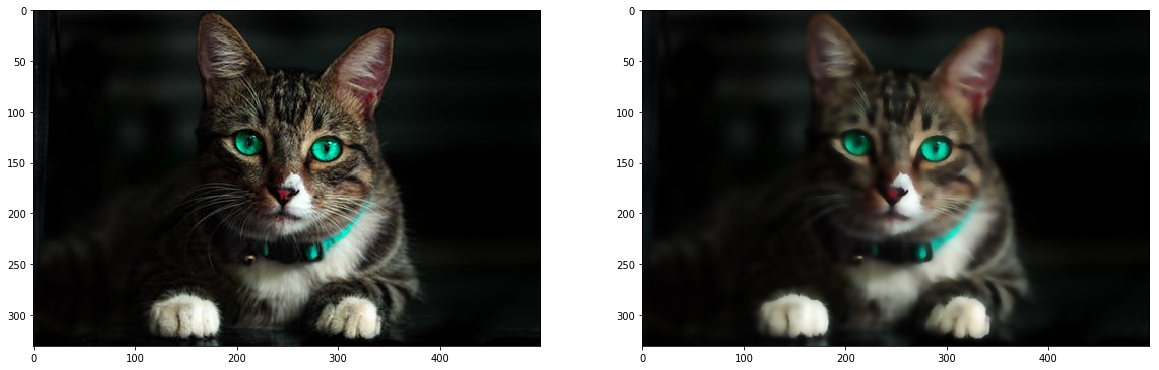

In [33]:
display(img_RGB, img_cartoon)

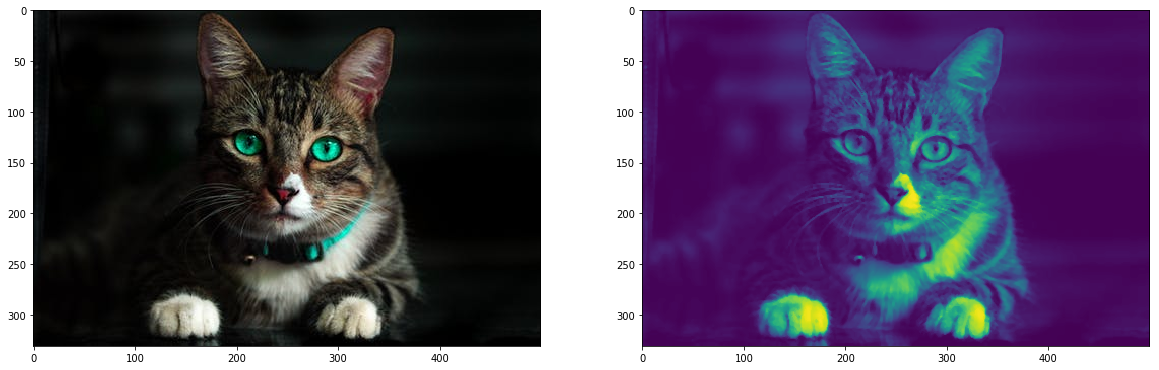

In [38]:
#reduce noise using median filter
#covert to grayscae and apply median blur

median = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
median = cv2.medianBlur(median,3)

display(img_RGB,median)


median blur softened the image amd reduced noise

In [0]:
#Create and edge mask 

img_edge = cv2.adaptiveThreshold(median, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

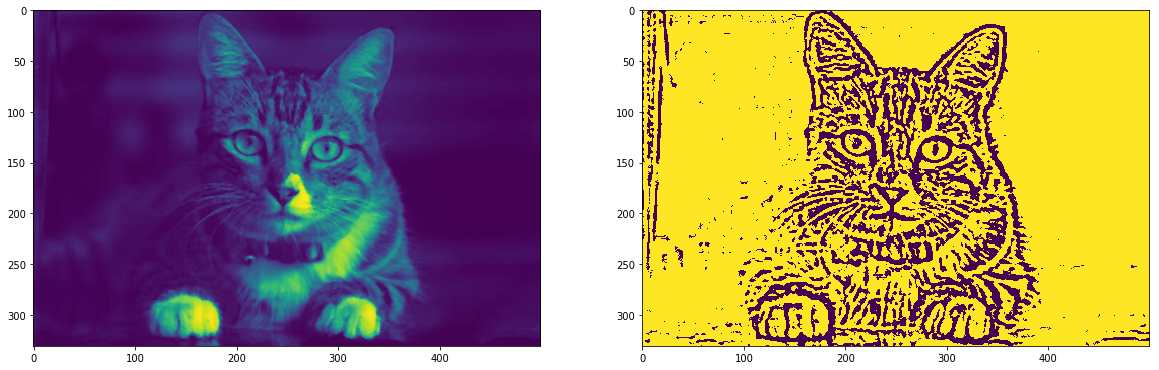

In [51]:
display(median,img_edge)

The threshdoling resulted in an edge highlighed image. 

In [0]:
#combine the color image with the edge mask

img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB) #convert back to RGB
img_cartoon = cv2.bitwise_and(img_cartoon, img_edge)




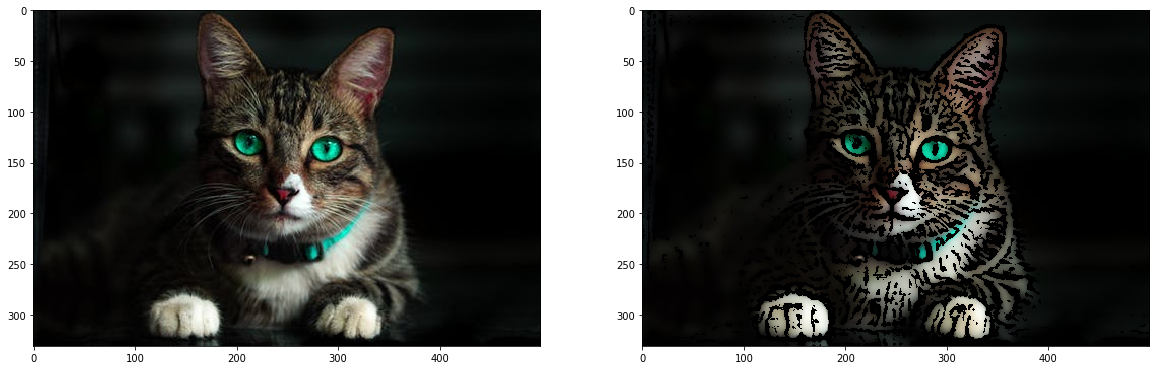

In [49]:
display(img_RGB,img_cartoon)